<div>
<img src="https://raw.githubusercontent.com/cgoliver/rnaglib/master/images/rgl.png#gh-light-mode-only" width="20%"/>
</div>

# RNA 3D/2.5D analysis and ML using the RNA Geometric Library `(rnaglib)`



In this tutorial we demonstrate some of the key functionalities of `rnaglib`.

- [ ] Accessing 2.5D datasets
- [ ] Generating graphs from 3D
- [ ]  Inspectinig 2.5D annotations
- [ ] RNA 3D dataset construction
- [ ]  Model training and evaluation


<div>
<img src="https://raw.githubusercontent.com/cgoliver/rnaglib/master/images/rgl_fig.png" width="80%"/>
</div>


**Resources**

* [Documentation](https://rnaglib.readthedocs.io/en/latest/?badge=latest)
* [Source Code](https://github.com/cgoliver/rnaglib)
* [Homepage](https://rnaglib.cs.mcgill.ca/)
* [Twitter](https://twitter.com/rnaglib)
* Contact: `rnaglib@cs.mcgill.ca`

Notebook authors: Carlos Oliver, Vincent Mallet

**Note**: all data handled by `rnaglib` is createdy [x3dna-dssr](https://x3dna.org/) by annotating RNA coordinate files with base pair geometries, secondary structure, protein interfacing, etc.

---

### Install the library

You can install it through PyPi 


In [ ]:
! pip3 install rnaglib

Or to get the latest version before it is released

```
git clone https://github.com/cgoliver/rnaglib.git
cd rnaglib
pip install -e .
```

### Get a pre-built dataset of structures

The library ships with a command line utility to download different datasets we prepare and host on [Zenodo](https://sandbox.zenodo.org/record/1168342).

By default the download script gets you the latest version of the [non-redundant](http://rna.bgsu.edu/rna3dhub/nrlist) set of structures to `~/.rnaglib`. 
This will get you 1176 structures.

Let's get the default download and pass the `--overwrite` flag to make sure we get a fresh download.

In [2]:
! rnaglib_download --overwrite

Required dataset not found, launching a download. This should take about a minute
Saving to : /home/carlosoliver/.rnaglib/datasets
[==================================================] 100.00 %

Another useful download is the complete set of 3D structures available on RCSB-PDB but the download takes a bit more time. At this current release, will get you 5759 structures.

In [4]:
! rnaglib_download -r all

Required dataset not found, launching a download. This should take about a minute
Saving to : /home/carlosoliver/.rnaglib/datasets
[==================================================] 100.00 %       ] 26.16 %                 ] 56.12 %=======================                    ] 60.03 % 61.05 %    ] 62.97 %        ] 64.21 %    ] 67.06 % 67.14 %    ] 67.38 %=====                ] 69.64 %64 %    ] 73.67 %    ] 74.12 %=================             ] 74.33 %    ] 76.02 %=====            ] 76.64 %    ] 76.76 %91 %    ] 78.09 %    ] 78.33 %    ] 78.42 %    ] 78.56 %    ] 78.74 %    ] 79.01 %    ] 79.10 %    ] 79.77 %======           ] 79.80 %    ] 79.86 %    ] 80.25 %    ] 80.72 %=======          ] 80.81 %    ] 80.89 %    ] 80.99 %        ] 81.26 %    ] 81.29 %========================          ] 81.33 %========================          ] 81.43 %    ] 81.46 %    ] 81.69 %    ] 81.80 %    ] 81.88 %    ] 82.00 %    ] 82.03 %=====================         ] 82.23 %=====================         ] 8

## Loading an RNA

Now that the data is downloaded, we can load it using `rgl`.
Let's import two utitlities that tell us which PDBs are available, and one that loads the annotations into a `networkx` graph.


In [14]:
from rnaglib.utils import available_pdbids
from rnaglib.utils import graph_from_pdbid

non_redundant = available_pdbids()
all_rnas = available_pdbids(redundancy='all')

print(f"non-redundant: {len(non_redundant)}, all: {len(all_rnas)}")

non-redundant: 1176, all: 5759


Let's pick one and load its graph.

In [15]:
G = graph_from_pdbid(non_redundant[0])

## Inspecting an RNA graph

The resulting graphs have three levels of annotations:

* Whole RNA (graph-level): PDBID, global secondary structure, resolution, list of ligands
* Nucleotide (node-level): nucleotide type, secondary structure element, binding info 
* Base pair / backbone (edge-level): backbone vs base-parir, base pair geometry (Leontis-Westhof, Saenger, DSSR)

Node IDs in the graph have the following format: `<pdbid>.<chain_id>.<residue_number>`.

You can use the normal `networkx` graph attributes to access these.

In [11]:
G.graph

{'dbn': {'all_chains': {'num_nts': 9327,
   'num_chars': 9354,
   'bseq': 'UGGAGAGUUUGAUCCUGGCUCAGGGUGAACGCUGGCGGCGUGCCUAAGACAUGCAAGUCGUGCGGGCCGCGGGGUUUUACUCCGUGGUCAGCGGCGGACGGGUGAGUAACGCGUGGGUGACCUACCCGGAAGAGGGGGACAACCCGGGGAAACUCGGGCUAAUCCCCCAUGUGGACCCGCCCCUUGGGGUGUGUCCAAAGGGCUUUGCCCGCUUCCGGAUGGGCCCGCGUCCCAUCAGCUAGUUGGUGGGGUAAUGGCCCACCAAGGCGACGACGGGUAGCCGGUCUGAGAGGAUGGCCGGCCACAGGGGCACUGAGACACGGGCCCCACUCCUACGGGAGGCAGCAGUUAGGAAUCUUCCGCAAUGGGCGCAAGCCUGACGGAGCGACGCCGCUUGGAGGAAGAAGCCCUUCGGGGUGUAAACUCCUGAACCCGGGACGAAACCCCCGACGAGGGGACUGACGGUACCGGGGUAAUAGCGCCGGCCAACUCCGUGCCAGCAGCCGCGGUAAUACGGAGGGCGCGAGCGUUACCCGGAUUCACUGGGCGUAAAGGGCGUGUAGGCGGCCUGGGGCGUCCCAUGUGAAAGACCACGGCUCAACCGUGGGGGAGCGUGGGAUACGCUCAGGCUAGACGGUGGGAGAGGGUGGUGGAAUUCCCGGAGUAGCGGUGAAAUGCGCAGAUACCGGGAGGAACGCCGAUGGCGAAGGCAGCCACCUGGUCCACCCGUGACGCUGAGGCGCGAAAGCGUGGGGAGCAAACCGGAUUAGAUACCCGGGUAGUCCACGCCCUAAACGAUGCGCGCUAGGUCUCUGGGUCUCCUGGGGGCCGAAGCUAACGCGUUAAGCGCGCCGCCUGGGGAGUACGGCCGCAAGGCUGAAACUCAAAGGAAUUGACGGGGGCCCGCACAAGCGGUGGAGCAUGU

In [17]:
list(G.nodes(data=True))[0]

('4v9i.AY.59',
 {'index': 1716,
  'index_chain': 59,
  'chain_name': 'AY',
  'nt_resnum': 59,
  'nt_name': 'A',
  'nt_code': 'A',
  'nt_id': 'AY.A59',
  'nt_type': 'RNA',
  'dbn': '.',
  'summary': "turn,anti,~C3'-endo,non-canonical,non-pair-contact,multiplet,hairpin-loop",
  'alpha': 75.053,
  'beta': -153.616,
  'gamma': 82.103,
  'delta': 102.379,
  'epsilon': -124.616,
  'zeta': -73.951,
  'epsilon_zeta': -50.665,
  'bb_type': '--',
  'chi': -172.977,
  'glyco_bond': 'anti',
  'C5prime_xyz': [-1.254, 8.14, 1.466],
  'P_xyz': [1.266, 7.514, 2.051],
  'form': '.',
  'ssZp': 4.376,
  'Dp': 4.406,
  'splay_angle': 24.068,
  'splay_distance': 4.032,
  'splay_ratio': 0.212,
  'eta': 39.708,
  'theta': -102.5,
  'eta_prime': 57.186,
  'theta_prime': -102.02,
  'eta_base': 70.266,
  'theta_base': -77.599,
  'v0': 11.603,
  'v1': -22.047,
  'v2': 23.378,
  'v3': -17.624,
  'v4': 3.994,
  'amplitude': 23.702,
  'phase_angle': 350.506,
  'puckering': "C2'-exo",
  'sugar_class': "~C3'-endo",
 

In [19]:
list(G.edges(data=True))[3]

('4v9i.AY.59',
 '4v9i.AY.20',
 {'index': 845,
  'nt1': 'AY.A59',
  'nt2': 'AY.U20',
  'bp': 'A-U',
  'name': '--',
  'Saenger': '--',
  'LW': 'tWH',
  'DSSR': 'tM-W'})

- [x] Accessing 2.5D datasets
- [x] Generating graphs from 3D
- [x]  Inspectinig 2.5D annotations
- [ ] RNA 3D dataset construction
- [ ]  Model training and evaluation


## Creating your own annotated graphs

If you have your own PDBs and an installation of `x3dna-dssr` on your system you can build these annotations yourself through `rnaglib`.

I have downloaded [this](https://www.rcsb.org/structure/4NLF) PDB and will build a graph from it.

In [16]:
from rnaglib.prepare_data import cif_to_graph

# change the path to where it is on your system
pdbid, status, my_G = cif_to_graph("/home/carlosoliver/Downloads/4nlf.cif", return_graph=True)

[Errno 2] No such file or directory: 'x3dna-dssr'


ValueError: not enough values to unpack (expected 3, got 2)

## Loading an RNA dataset

The `rnaglib.data_loading.RNADataset` object builds and provides access to collections of RNAs. 
This will be useful when training deep learning models.

When using the `Dataset` class, our standard data distribution should be downloaded automatically. Alternatively, you can choose to provide your own annotated RNAs by providing a `data_path` or using `RNADataset.from_args()` class method.


In [10]:
from rnaglib.data_loading import RNADataset

dataset = RNADataset()

rna_1 = dataset[3]
pdbid = dataset.all_graphs[3]
rna_2 = dataset.get_pdbid(pdbid)

print(f"{pdbid} {rna_2}")

Dataset was found and not overwritten
1csl {'rna_name': '1csl.json', 'rna': <networkx.classes.digraph.DiGraph object at 0x7fae4951f3a0>, 'path': '/home/carlosoliver/.rnaglib/datasets/rnaglib-nr-1.0.0/graphs/1csl.json'}


## Quick visualization

We provide some utilities for drawing RNAs through the networkx drawing library. Of course this is not meant for productio-ready visualizations but more for debugging and drawing quick insights.



<Axes: >

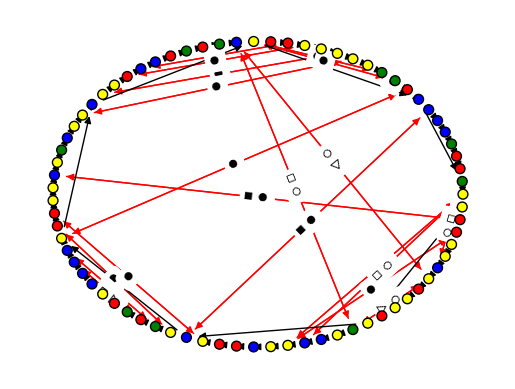

In [20]:
from rnaglib.drawing import rna_draw

rna_draw(G)

## Mini project: small molecule binding site geometry

Now we do a mini project to get used to the data structure.
We ask whether binding sites tend to have certain geometric properties when compared to a random sample of RNA sites.
To do this we will have a look at the small molecule binding information, edge and secondary structure annotations.


First we grab a list of nodes involved from our `dataset` that was created above in small molecule binding and a random sample.

In [29]:
import random

pockets = []
for i, d in enumerate(dataset):
    G = d['rna']
    try:
        pocket = [n for n, data in G.nodes(data=True) if data['binding_small-molecule'] is not None]
        # sample same number of random nucleotides
        non_pocket = random.sample(list(G.nodes()), k=len(pocket))
    except KeyError as e:
        continue
    if pocket:
        pockets.append((pocket, non_pocket, G))
    else:
        # no pocket found
        pass

print(f"binding nodes {pockets[0][0]}, \n random sample {pockets[0][1]}, \n graph {pockets[0][2]}")

binding nodes ['1b23.R.18', '1b23.R.19', '1b23.R.22', '1b23.R.23', '1b23.R.30', '1b23.R.31', '1b23.R.33', '1b23.R.34', '1b23.R.36', '1b23.R.38', '1b23.R.40', '1b23.R.46', '1b23.R.53', '1b23.R.56', '1b23.R.57', '1b23.R.58', '1b23.R.59', '1b23.R.60', '1b23.R.61'], 
 random sample ['1b23.R.49', '1b23.R.31', '1b23.R.15', '1b23.R.53', '1b23.R.25', '1b23.R.4', '1b23.R.40', '1b23.R.41', '1b23.R.50', '1b23.R.19', '1b23.R.30', '1b23.R.27', '1b23.R.12', '1b23.R.75', '1b23.R.39', '1b23.R.51', '1b23.R.67', '1b23.R.16', '1b23.R.32'], 
 graph DiGraph with 74 nodes and 210 edges


Now we have a list of pockets where each is a thruple of a list of pocket nodes, a list of non-pocket nodes, and the parent graph. Let’s collect some stats about these residues. Namely, what base pair types and secondary structure elements they are involved in.

In [31]:
import pandas as pd

bps, sses = [], []

for pocket, non_pocket, G in pockets:
    for nt in pocket:
        # add edge type of all base pairs in pocket
        bps.extend([{'bp_type': data['LW'],
                     'is_pocket': True} for _, data in G[nt].items()])
        # sse key is format '<sse type>_<id>'
        node_data = G.nodes[nt]
        if node_data['sse']['sse'] is None:
            continue
        sses.append({'sse_type': node_data['sse']['sse'].split("_")[0],
                     'is_pocket': True})

    # do the same for non-pocket
    for nt in non_pocket:
        # add edge type of all base pairs in pocket
        bps.extend([{'bp_type': data['LW'],
                     'is_pocket': False} for _, data in G[nt].items()])
        # sse key is format '<sse type>_<id>'
        node_data = G.nodes[nt]
        if node_data['sse']['sse'] is None:
            continue
        sses.append({'sse_type': node_data['sse']['sse'].split("_")[0],
                     'is_pocket': False})

# for convenience convert to dataframe
bp_df = pd.DataFrame(bps)
sse_df = pd.DataFrame(sses)

Finally we can draw some plots of the base pair type and secondary structure element distribution around small molecule binding sites.

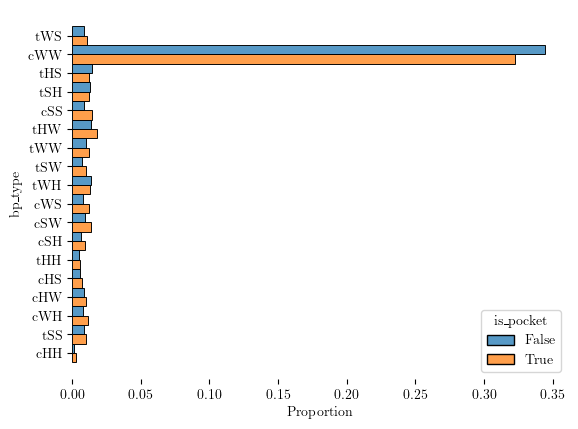

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# remove backbones
bp_df = bp_df.loc[~bp_df['bp_type'].isin(['B35', 'B53'])]

sns.histplot(y='bp_type', hue='is_pocket', multiple='dodge', stat='proportion', data=bp_df)
sns.despine(left=True, bottom=True)
plt.show()



And now for secondary structure elements.

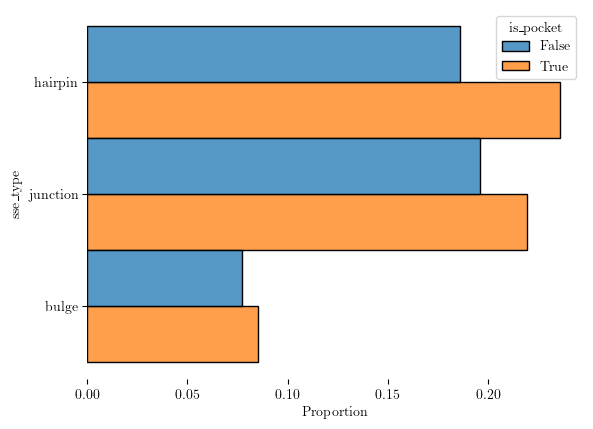

In [36]:
sns.histplot(y='sse_type', hue='is_pocket', multiple='dodge', stat='proportion', data=sse_df)
sns.despine(left=True, bottom=True)
plt.show()

## Training ML models

Next we show how you can use rnaglib to build machine learning datasets and train models with various prediction tasks.



### Graph, Voxel, Point Cloud Representations

The next important object for `rnaglib` is the representation. Previously, our `Dataset` only included the raw data. One can add a Representation object with arguments to post-process this raw data into a more usable data format. The most trivial one is to ask for a GraphRepresentation. One can choose either networkx, DGL or PyTorch Geometric as a return type.

By default, this 2.5D graph only includes the connectivity of the graphs. The user can ask for input nucleotide features and nucleotide targets. As an example, we use nucleotide identity (‘nt_code’) as input and the binding of an ion (‘binding_ion’) as output. These two additions are exemplified below

**NOTE**: at this point you may have to install additional libraries depending on which framework you plan to train with e.g. dgl, pytorch, pytorch-geometric. For this example we will use dgl.

In [39]:
! pip3 install dgl

  Using cached dgl-1.0.1-cp39-cp39-manylinux1_x86_64.whl (5.4 MB)


In [40]:
from rnaglib.data_loading import FeaturesComputer
from rnaglib.representations import GraphRepresentation

feature_computer = FeaturesComputer(nt_features='nt_code', nt_targets='binding_ion')
graph_rep = GraphRepresentation(framework='dgl')
dataset = RNADataset(version='1.0.0', features_computer=feature_computer, representations=graph_rep)
dataset[0]['graph']

Dataset was found and not overwritten


Graph(num_nodes=24, num_edges=58,
      ndata_schemes={'nt_features': Scheme(shape=(4,), dtype=torch.float32), 'nt_targets': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'edge_type': Scheme(shape=(), dtype=torch.int64)})

Now each item in the `Dataset` contains an additional key `graph` which is a `DGLData` object.

We currently support two other data representations : PointCloudRepresentation and VoxelRepresentation More generally, rnaglib.representations.Representation class holds the logic for converting a dataset to one of the above representations and users can easily sub-class this to create their own representations.

These classes come with their own set of attributes. Users can use several representations at the same time.

In [42]:
from rnaglib.representations import PointCloudRepresentation, VoxelRepresentation

pc_rep = PointCloudRepresentation()
voxel_rep = VoxelRepresentation(spacing=2)

dataset.add_representation(voxel_rep)
dataset.add_representation(pc_rep)
print(dataset[0].keys())

dict_keys(['rna_name', 'rna', 'path', 'graph', 'voxel', 'point_cloud'])


As can be seen, we now have additional keys in the returned dictionnary corresponding to the data represented as voxels or point clouds. In our case, the RNA has 24 nucleotides and is approximately 12 Angrstroms wide. Hence, dataset[0][‘point_cloud’] is a dictionnary that contains two grids in the PyTorch order :

```
voxel_feats : torch.Size([4, 6, 5, 6])

voxel_target : torch.Size([1, 6, 5, 6])
```

While `dataset[0][‘point_cloud’]` is a dictionnary that contains one list and three tensors :

```
point_cloud_coords torch.Size([24, 3])

point_cloud_feats torch.Size([24, 4])

point_cloud_targets torch.Size([24, 1])

point_cloud_nodes ['1a9n.Q.0', '1a9n.Q.1',... '1a9n.Q.9']
```

### Dataloaders

The missing piece is utilities to efficiently load our dataset for machine learning. The first task is to split our data in a principled way. To enhance reproducibility, we offer automatic random splitting procedure that avoid loading useless graphs (for instance graphs with no positive nodes for node classification) and balance the train/test proportions in the multi-task setting.

The other problematic step is to batch our data automatically, as the batching procedure depends on the representations that are used. These two functionalities are implemented in a straightforward manner :

In [44]:
from torch.utils.data import DataLoader
from rnaglib.data_loading import split_dataset, Collater

train_set, valid_set, test_set = split_dataset(dataset, split_train=0.7, split_valid=0.85)
collater = Collater(dataset=dataset)
train_loader = DataLoader(dataset=train_set, shuffle=True, batch_size=2, num_workers=0, collate_fn=collater.collate)

for batch in train_loader:
    print(batch)
    break

{'graph': Graph(num_nodes=41, num_edges=114,
      ndata_schemes={'nt_features': Scheme(shape=(4,), dtype=torch.float32), 'nt_targets': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'edge_type': Scheme(shape=(), dtype=torch.int64)}), 'voxel': {'voxel_feats': [tensor([[[[3.3452e-26, 4.4536e-23, 1.2719e-21, 8.3281e-22, 1.3297e-23,
           2.0626e-26],
          [1.2030e-20, 1.7493e-17, 5.7094e-16, 4.2906e-16, 7.6589e-18,
           1.2555e-20],
          [8.3251e-17, 1.3640e-13, 5.1307e-12, 4.3225e-12, 8.3985e-14,
           1.4197e-16],
          [1.1309e-14, 2.1301e-11, 9.1042e-10, 8.3420e-10, 1.7327e-11,
           2.9867e-14],
          [3.0638e-14, 6.6264e-11, 3.1272e-09, 3.0356e-09, 6.6845e-11,
           1.1715e-13],
          [1.6614e-15, 4.0381e-12, 2.0408e-10, 2.0613e-10, 4.8107e-12,
           8.5894e-15]],

         [[2.1213e-21, 2.6607e-18, 6.7871e-17, 3.8518e-17, 7.2362e-19,
           4.6249e-21],
          [7.3112e-16, 9.6184e-13, 2.6940e-11, 1.7634e-11

Additional inputs and outputs
Adding more input features to the graphs is straightforward, as you simply have to specify more items in the features list. A full description of the input features that can be used is available in rnaglib.data. Similarly, you can seamlessly switch to a multi-task setting by adding more targets. However, doing this affects the splitting procedure. A side effect could be a slight deviation in the train/validation/test fractions. The tasks currently implemented are in the set : `{‘node_binding_small-molecule’, ‘node_binding_protein’, ‘node_binding_ion’, “node_is_modified”}`. An example of a variation is provided below, the rest of the code is unaffected.

```
nt_features = ['nt_code', "alpha", "C5prime_xyz", "is_modified"]
nt_targets = ['binding_ion', 'binding_protein']
```

At this point you can feed the loader to your own model architecture and trainers.

We also provide pre-built models that you can train yourself with your own choice of features and targets.

In this example we show how to train a model that takes an RNA structure and for each nucleotid, predicts whether it belongs to a protein binding interface.

In [45]:
import torch

from rnaglib.learning import models, learn
from rnaglib.data_loading import rna_dataset, rna_loader, FeaturesComputer
from rnaglib.representations import GraphRepresentation

features_computer = FeaturesComputer(nt_features='nt_code', nt_targets='binding_protein')
graph_rep = GraphRepresentation(framework='dgl')
all_graphs = ['1a9n.json', '1b23.json', '1b7f.json', '1csl.json', '1d4r.json', '1dfu.json', '1duq.json',
              '1e8o.json', '1ec6.json', '1et4.json']
supervised_dataset = rna_dataset.RNADataset(all_graphs=all_graphs,
                                            features_computer=features_computer,
                                            representations=[graph_rep])

train_loader, validation_loader, test_loader = rna_loader.get_loader(dataset=supervised_dataset).get_data()

# Define a model, we first embed our data in 10 dimensions, and then add one classification
input_dim, target_dim = feature_computer.input_dim, feature_computer.output_dim
embedder_model = models.Embedder(dims=[10, 10], infeatures_dim=input_dim)
classifier_model = models.Classifier(embedder=embedder_model, classif_dims=[target_dim])

# Finally get the training going
optimizer = torch.optim.Adam(classifier_model.parameters(), lr=0.001)
learn.train_supervised(model=classifier_model,
                       optimizer=optimizer,
                       train_loader=train_loader)

ModuleNotFoundError: No module named 'dgl.dataloading.pytorch'

# Recap

We have shown how `rnaglib` can serve the computational biology and machine learning communities through our core features:
